
# **Bike Sharing Systems**
## **Introduction**
Bike-sharing systems offer a convenient and automated way to rent bicycles, with membership, rental, and return processes managed through kiosks located across a city. The data generated by these systems provides valuable opportunities to analyze usage patterns and discover hidden insights. By examining historical usage data alongside weather conditions, this project aims to differentiate between registered and casual users and forecast rental demand for the Capital Bikeshare program in Washington, D.C.

## **Overview**
https://www.kaggle.com/competitions/bike-sharing-demand/overview
The dataset offers hourly rental data spanning two years for the Capital Bikeshare program in Washington, D.C. Through exploratory data analysis and model evaluation, the objective is to identify a suitable model that can accurately forecast bike rental demand for various time frames, such as the next month, week, or day.

Raw Data Field definitions are as below:

    1. datetime: hourly date + timestamp
    2. season: 1 = spring, 2 = summer, 3 = fall, 4 = winter
    3. holiday: whether the day is considered a holiday
    4. workingday: whether the day is neither a weekend nor holiday
    5. weather:
        1: Clear, Few clouds, Partly cloudy, Partly cloudy
        2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    6. temp: temperature in Celsius
    7. atemp: "feels like" temperature in Celsius
    8. humidity: relative humidity
    9. windspeed: wind speed
    10. casual: number of non-registered user rentals initiated
    11. registered: number of registered user rentals initiated
    13. count: number of total rentals

Two sets of data are available- The training dataset and the Testing dataset. Additional test data will be manufactured as needed.

    







In [2]:
!kaggle competitions download -c bike-sharing-demand -p C:/Users/dpamu/kaggle_data



  0%|          | 0.00/189k [00:00<?, ?B/s]
100%|##########| 189k/189k [00:00<00:00, 3.56MB/s]


In [2]:
import os

# Check the contents of the kaggle_data directory again
download_path = r'C:\Users\dpamu\kaggle_data'
print("Contents of kaggle_data directory:", os.listdir(download_path))


Contents of kaggle_data directory: ['bike-sharing-demand.zip', 'sampleSubmission.csv', 'test.csv', 'train.csv']


In [3]:
import zipfile

# Define the path to the ZIP file
zip_file_path = os.path.join(download_path, 'bike-sharing-demand.zip')

# Check if the file exists and extract it
if os.path.exists(zip_file_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(download_path)
    print("Extraction completed. Files have been extracted to:", download_path)
else:
    print(f"ZIP file not found at {zip_file_path}.")


Extraction completed. Files have been extracted to: C:\Users\dpamu\kaggle_data


In [4]:
import pandas as pd
import os

extracted_path = r'C:\Users\dpamu\kaggle_data'
extracted_files = os.listdir(extracted_path)
train_file_path = os.path.join(extracted_path, 'train.csv')
test_file_path = os.path.join(extracted_path, 'test.csv')

train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

display(train_df.head(5)) 
display(test_df.head(5)) 



,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [7]:

#Exploring at data type specifics
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Inference:

season, holiday,workingday,weather are the categorical features.

temparature,atemp,humidity,windspeed,casual,registered are the numerical features.

The dependent feature is count (prediction variable in a model i.e ,y)

In [24]:
#check for null data
train_df.isnull().sum()

datetime       0
season         0
holiday        0
workingday     0
weather        0
temp           0
atemp          0
humidity       0
windspeed      0
casual         0
registered     0
count          0
date           0
time           0
temp_f         0
atemp_f        0
windspeed_r    0
dtype: int64

In [31]:
# Adding date and time columns and removing datetime for better analysis
train_df['datetime'] = pd.to_datetime(train_df['datetime'])

#Changing the metrics from Celcius to Fahrenheit for ease of understanding. Data is rounded to nearest degree Fahrenheit
train_df['temp_f'] = ((train_df['temp'] * 9/5) + 32).round(0)
train_df['atemp_f'] = ((train_df['atemp'] * 9/5) + 32).round(0)

#Windspeed rounded to nearest integer value
train_df['windspeed_r'] = (train_df['windspeed'] ).round(0)


# Extract date, year,month,day of the month, day of the week, and time separately for more granularity
train_df['date'] = train_df['datetime'].dt.date
train_df['time'] = train_df['datetime'].dt.time
train_df["hour"] = train_df["datetime"].dt.hour
train_df["day_of_week"] = train_df["datetime"].dt.dayofweek
train_df["month"] = train_df["datetime"].dt.month
train_df["year"] = train_df["datetime"].dt.year
train_df["day_of_month"] = train_df["datetime"].dt.day
train_final_df=train_df[['date','year','month','day_of_month','day_of_week','hour',
                         'season','holiday','workingday','weather','temp_f','atemp_f','humidity','windspeed_r','casual','registered','count']]
# Display the first few rows to confirm
display(train_final_df.head(5))


,date,year,month,day_of_month,day_of_week,hour,season,holiday,workingday,weather,temp_f,atemp_f,humidity,windspeed_r,casual,registered,count
0,2011-01-01,2011,1,1,5,0,1,0,0,1,50.0,58.0,81,0.0,3,13,16
1,2011-01-01,2011,1,1,5,1,1,0,0,1,48.0,57.0,80,0.0,8,32,40
2,2011-01-01,2011,1,1,5,2,1,0,0,1,48.0,57.0,80,0.0,5,27,32
3,2011-01-01,2011,1,1,5,3,1,0,0,1,50.0,58.0,75,0.0,3,10,13
4,2011-01-01,2011,1,1,5,4,1,0,0,1,50.0,58.0,75,0.0,0,1,1


In [32]:

train_final_df.describe()


,year,month,day_of_month,day_of_week,hour,season,holiday,workingday,weather,temp_f,atemp_f,humidity,windspeed_r,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011.501929,6.521495,9.992559,3.013963,11.541613,2.506614,0.028569,0.680875,1.418427,68.444516,74.592688,61.886460,12.799100,36.021955,155.552177,191.574132
std,0.500019,3.444373,5.476608,2.004585,6.915838,1.116174,0.166599,0.466159,0.633839,14.027494,15.277582,19.245033,8.164634,49.960477,151.039033,181.144454
min,2011.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,33.000000,33.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011.000000,4.000000,5.000000,1.000000,6.000000,2.000000,0.000000,0.000000,1.000000,57.000000,62.000000,47.000000,7.000000,4.000000,36.000000,42.000000
50%,2012.000000,7.000000,10.000000,3.000000,12.000000,3.000000,0.000000,1.000000,1.000000,69.000000,76.000000,62.000000,13.000000,17.000000,118.000000,145.000000
75%,2012.000000,10.000000,15.000000,5.000000,18.000000,4.000000,0.000000,1.000000,2.000000,79.000000,88.000000,77.000000,17.000000,49.000000,222.000000,284.000000
max,2012.000000,12.000000,19.000000,6.000000,23.000000,4.000000,1.000000,1.000000,4.000000,106.000000,114.000000,100.000000,57.000000,367.000000,886.000000,977.000000


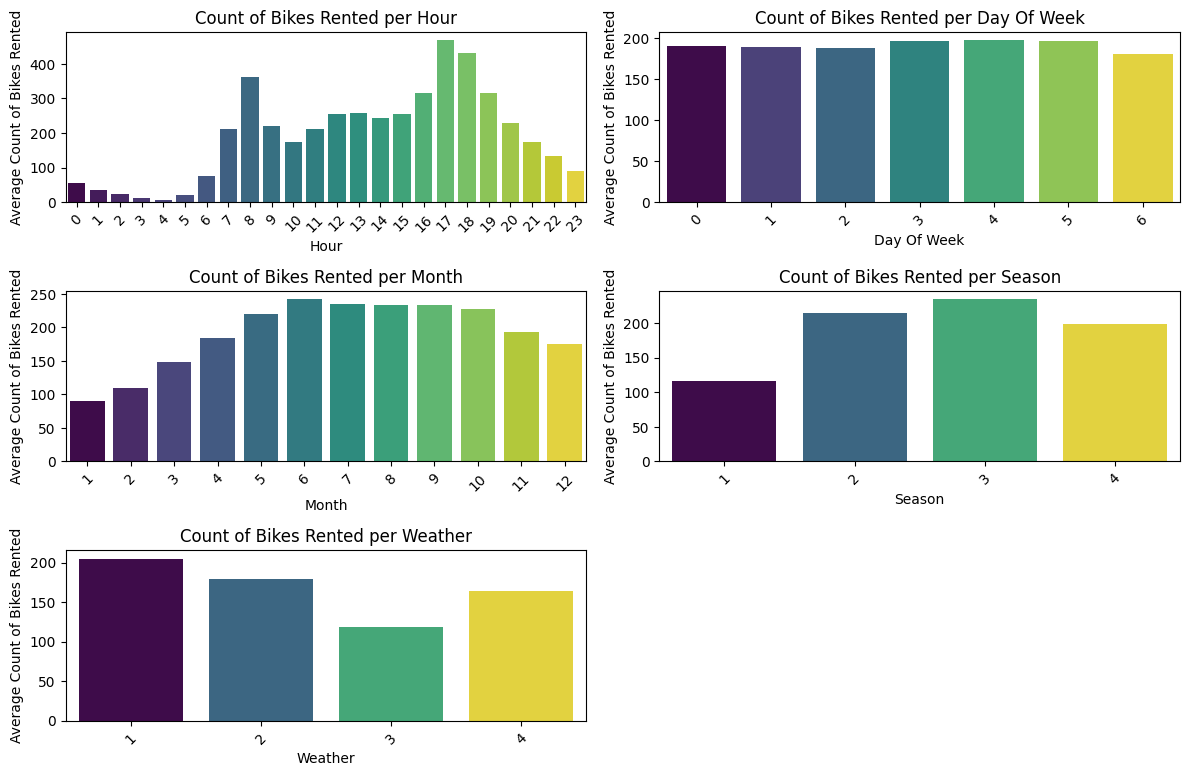

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_bike_counts(feature: str):
    # Create the bar plot without initializing a new figure
    sns.barplot(
        x=feature, 
        y='count', 
        data=train_final_df.groupby(feature)['count'].mean().reset_index(), 
        hue=feature, 
        palette='viridis', 
        legend=False
    )
    # Formatting the title
    title_feature = feature.replace('_', ' ').title()
    plt.title(f'Count of Bikes Rented per {title_feature}')
    plt.xlabel(title_feature)
    plt.ylabel('Average Count of Bikes Rented')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Main plotting logic
plt.figure(figsize=(12, 10))

# First subplot
plt.subplot(4, 2, 1)
plot_bike_counts('hour')

# Second subplot
plt.subplot(4, 2, 2)
plot_bike_counts('day_of_week')


# Third subplot
plt.subplot(4, 2, 3)
plot_bike_counts('month')


# Fourth subplot
plt.subplot(4, 2, 4)
plot_bike_counts('season')

# Fifth subplot
plt.subplot(4, 2, 5)
plot_bike_counts('weather')
     

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


Inferenes:
    1. The "Hour" bar plot indicates a significantly higher demand for bikes during peak hours, specifically at 8 AM and between 5 PM and 6 PM in the evening
    2. In the "Day of the Week" bar plot there isnt much variation in the usage
    3. In the "Month" bar plot months May through October has the  most rentals
    4. As with the  monthly plot,Season  bar plot shows same Spring, Summer having higher rentals
    5. In the "Weather" bar plot we can say maximum rental usage is whenthe  weather is Clear, Few clouds, Partly cloudy, Partly cloudy and Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

In [67]:
train_final_df.head(5)

,date,year,month,day_of_month,day_of_week,hour,season,holiday,workingday,weather,temp_f,atemp_f,humidity,windspeed_r,casual,registered,count
0,2011-01-01,2011,1,1,5,0,1,0,0,1,50.0,58.0,81,0.0,3,13,16
1,2011-01-01,2011,1,1,5,1,1,0,0,1,48.0,57.0,80,0.0,8,32,40
2,2011-01-01,2011,1,1,5,2,1,0,0,1,48.0,57.0,80,0.0,5,27,32
3,2011-01-01,2011,1,1,5,3,1,0,0,1,50.0,58.0,75,0.0,3,10,13
4,2011-01-01,2011,1,1,5,4,1,0,0,1,50.0,58.0,75,0.0,0,1,1


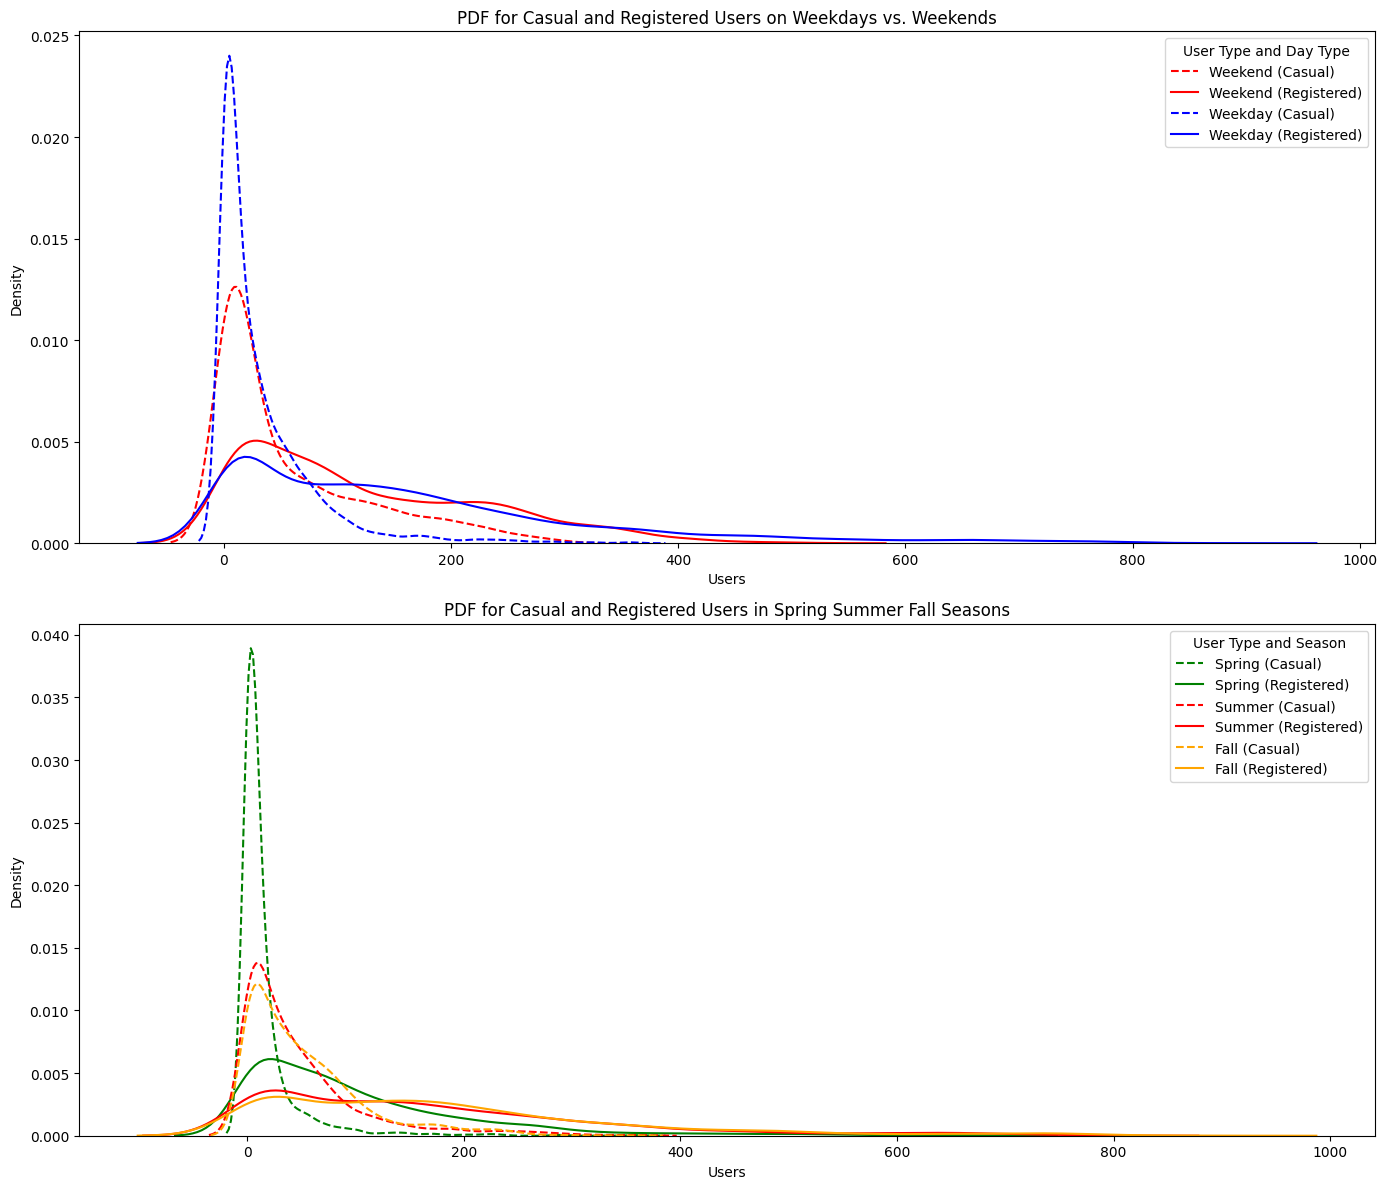

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(14, 12))

# Subplot 1: PDF for Casual and Registered Users on Weekdays vs. Weekends
plt.subplot(2, 1, 1)
sns.kdeplot(data=train_final_df[train_final_df['day_of_week'] > 5], x='casual', color='red', label='Weekend (Casual)', linestyle='--')
sns.kdeplot(data=train_final_df[train_final_df['day_of_week'] > 5], x='registered', color='red', label='Weekend (Registered)')
sns.kdeplot(data=train_final_df[train_final_df['day_of_week'] <= 5], x='casual', color='blue', label='Weekday (Casual)', linestyle='--')
sns.kdeplot(data=train_final_df[train_final_df['day_of_week'] <=5], x='registered', color='blue', label='Weekday (Registered)')

# Adding plot details for the first plot
plt.title('PDF for Casual and Registered Users on Weekdays vs. Weekends')
plt.xlabel('Users')
plt.ylabel('Density')
plt.legend(title='User Type and Day Type', loc='upper right', frameon=True)

# Subplot 2: PDF for Casual and Registered Users in Different Seasons
plt.subplot(2, 1, 2)
sns.kdeplot(data=train_final_df[train_final_df['season'] == 1], x='casual', color='green', label='Spring (Casual)', linestyle='--')
sns.kdeplot(data=train_final_df[train_final_df['season'] == 1], x='registered', color='green', label='Spring (Registered)')
sns.kdeplot(data=train_final_df[train_final_df['season'] == 2], x='casual', color='red', label='Summer (Casual)', linestyle='--')
sns.kdeplot(data=train_final_df[train_final_df['season'] == 2], x='registered', color='red', label='Summer (Registered)')
sns.kdeplot(data=train_final_df[train_final_df['season'] == 3], x='casual', color='orange', label='Fall (Casual)', linestyle='--')
sns.kdeplot(data=train_final_df[train_final_df['season'] == 3], x='registered', color='orange', label='Fall (Registered)')


# Adding plot details for the second plot
plt.title('PDF for Casual and Registered Users in Spring Summer Fall Seasons')
plt.xlabel('Users')
plt.ylabel('Density')
plt.legend(title='User Type and Season', loc='upper right', frameon=True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


#season: 1 = spring, 2 = summer, 3 = fall, 4 = winter


1. From the KDE plot for Causal and Registered Weekend vs Weekday, Causal users tend to  rent bikes more  on weekdays than on weekends unlike the registered users who rent more on weekends than on weekdays.

2. From the KDE plot for Causal and Registered Weekend vs Weekday, Causal users tend to rent bikes the most in Spring followed by summer and fall
The registers too have the same trend Spring->Summer->Fall

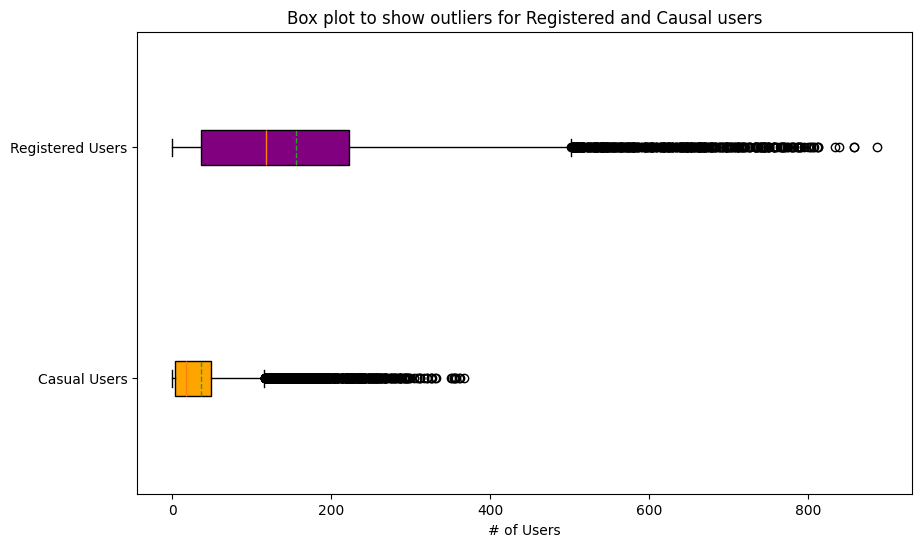

In [132]:

users_causaul_registered = [train_final_df['casual'], train_final_df['registered']]
colors = ['orange', 'purple']

plt.figure(figsize=(10, 6))

box = plt.boxplot(users_causaul_registered, vert=False, showmeans=True, meanline=True, patch_artist=True)
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
# add labels in y axis
plt.yticks([1, 2], ['Casual Users', 'Registered Users'])

plt.title('Box plot to show outliers for Registered and Causal users')
plt.xlabel("# of Users")          
plt.show()





Box plots for Registered and Casual users show many bike riders outside of typical usage(outliers), causing it to skew to the right.
Mean line shown in the dotted green line is higher than the median proving the skewness to the right.

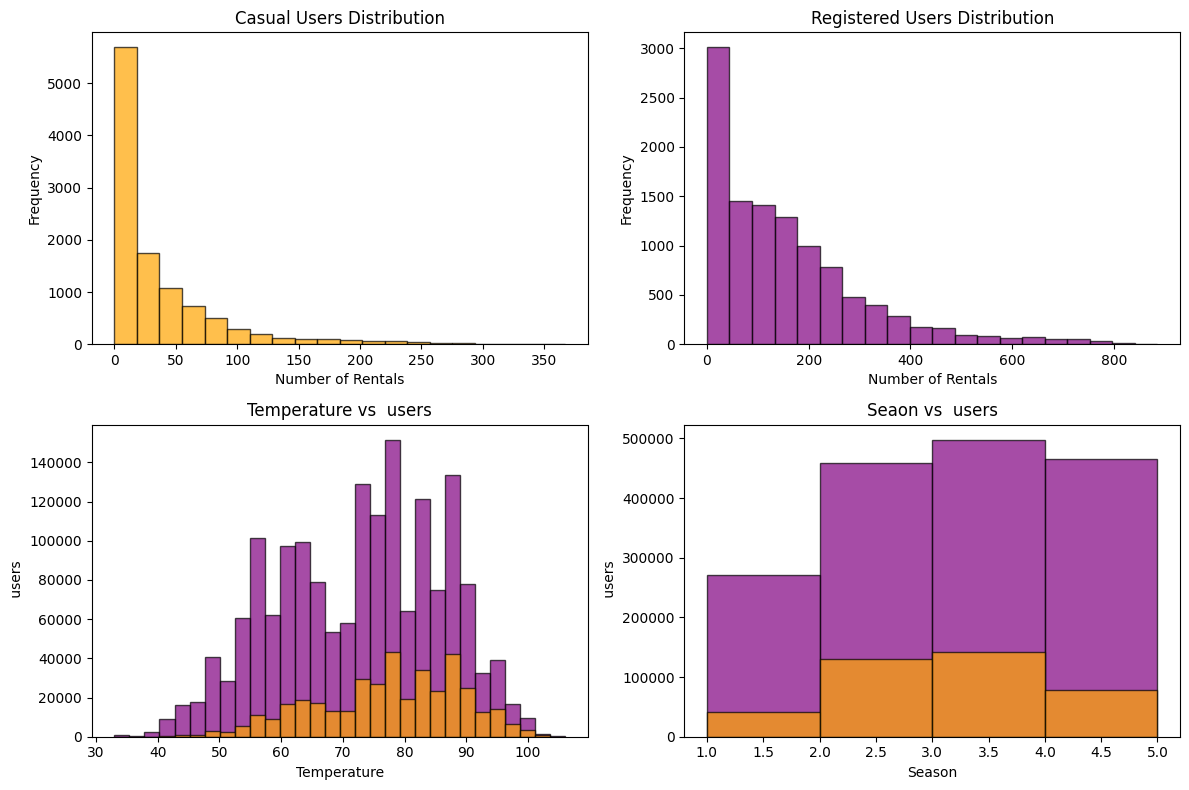

In [131]:
import matplotlib.pyplot as plt

# Plotting histograms for 'casual' and 'registered' users to compare their distributions
plt.figure(figsize=(12, 8))

# Histogram for 'casual' users
plt.subplot(2, 2, 1)
plt.hist(train_final_df['casual'], bins=20, alpha=0.7, color='orange', edgecolor='black')
plt.title('Casual Users Distribution')
plt.xlabel('Number of Rentals')
plt.ylabel('Frequency')

# Histogram for 'registered' users
plt.subplot(2, 2, 2)
plt.hist(train_final_df['registered'], bins=20, alpha=0.7, color='purple', edgecolor='black')
plt.title('Registered Users Distribution')
plt.xlabel('Number of Rentals')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(train_final_df['temp_f'], bins=30, weights=train_final_df['registered'], color='purple', edgecolor='black', alpha=0.7)
plt.hist(train_final_df['temp_f'], bins=30, weights=train_final_df['casual'], color='orange', edgecolor='black', alpha=0.7)
#generate plot
plt.title("Temperature vs  users")
plt.xlabel("Temperature")
plt.ylabel(" users")

plt.subplot(2, 2, 4)
plt.hist(train_final_df['season'], bins=[1, 2, 3, 4,5], weights=train_final_df['registered'], color='purple', edgecolor='black', alpha=0.7)
plt.hist(train_final_df['season'], bins=[1, 2, 3, 4,5], weights=train_final_df['casual'], color='orange', edgecolor='black', alpha=0.7)

#generate plot
plt.title("Seaon vs  users")
plt.xlabel("Season")
plt.ylabel(" users")

plt.tight_layout()
plt.show()

    1. From Causual and Registered users  distributions we can say that it is right skewed distributon.
    2. From the Tempearaturev vs users histogram shows that there are 2 peaks -i) maximum number bike riders rent when temperature is between 70 F-90 F
        ii) second peak is between 55F-65F
    3. The season vs users histograms shows that peak usage for 2 years happens to be in Fall with surprisingly summer and winter rental ussage being same and spring being  the least overall
        

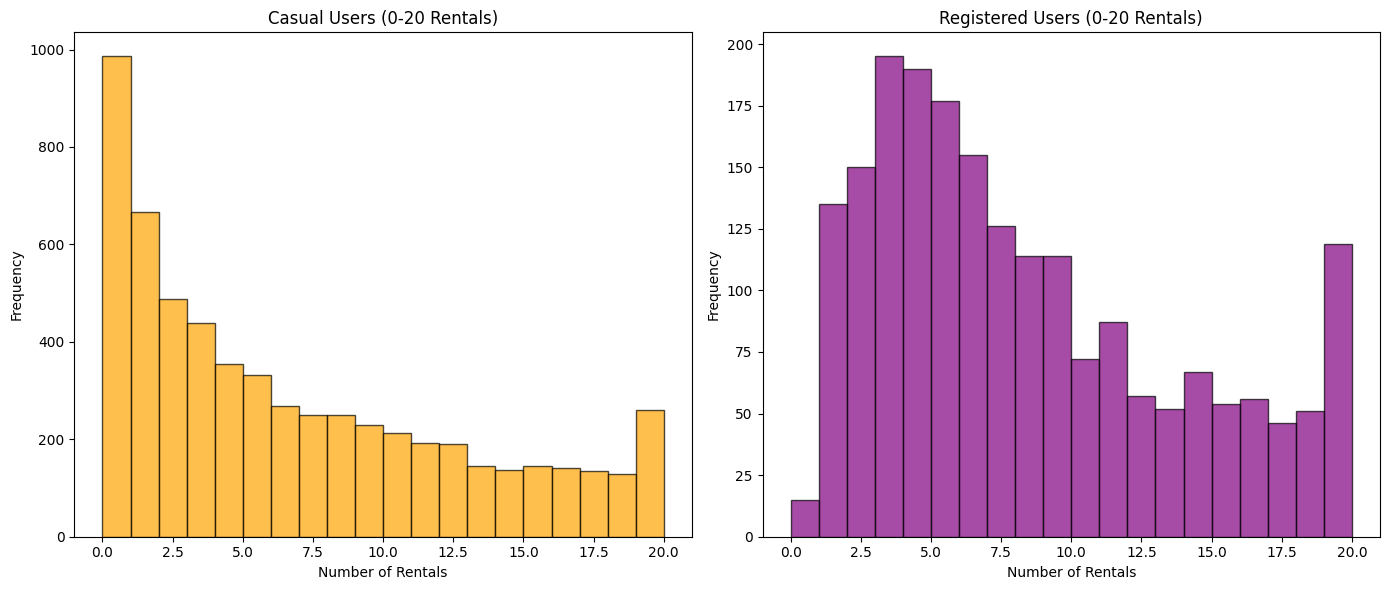

In [94]:
# Filtering the original data to include only rows where the number of rentals is between 0 and 20 for both casual and registered users
casual_filtered = train_final_df['casual'][train_final_df['casual'] <= 20]
registered_filtered = train_final_df['registered'][train_final_df['registered'] <= 20]

# Plotting the distributions of casual and registered users with rentals between 0 and 20
plt.figure(figsize=(14, 6))

# Plot for filtered 'casual' rentals (0-20)
plt.subplot(1, 2, 1)
plt.hist(casual_filtered, bins=20, alpha=0.7, color='orange', edgecolor='black')
plt.title('Casual Users (0-20 Rentals)')
plt.xlabel('Number of Rentals')
plt.ylabel('Frequency')

# Plot for filtered 'registered' rentals (0-20)
plt.subplot(1, 2, 2)
plt.hist(registered_filtered, bins=20, alpha=0.7, color='purple', edgecolor='black')
plt.title('Registered Users (0-20 Rentals)')
plt.xlabel('Number of Rentals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

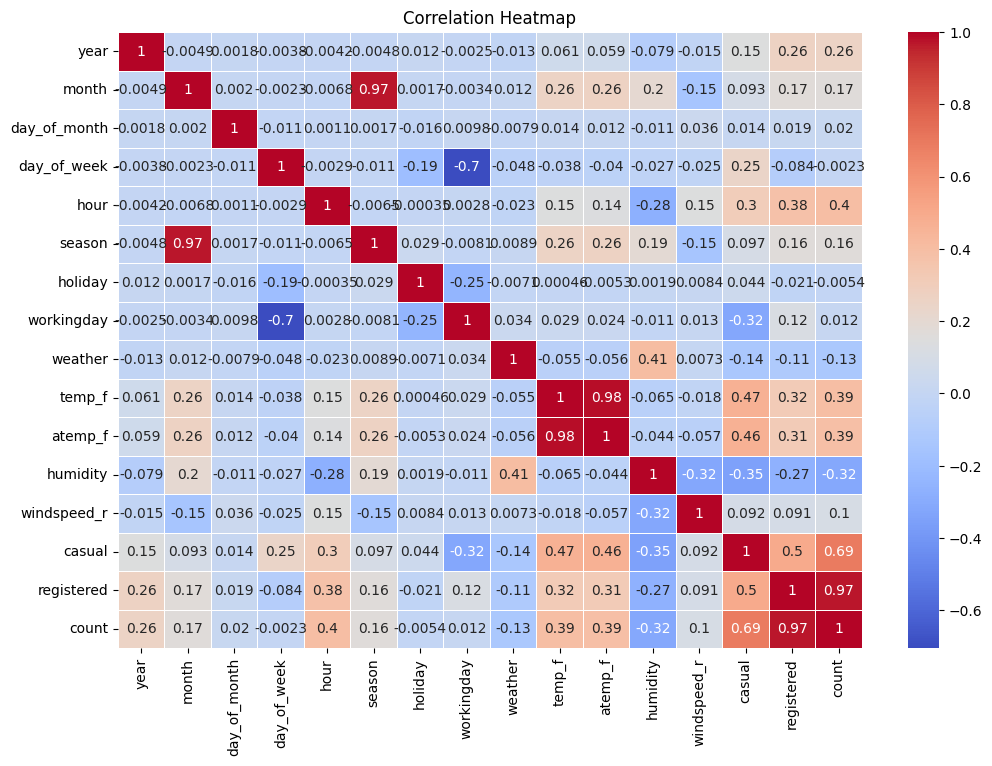

In [89]:
plt.figure(figsize=(12,8))
sns.heatmap(train_final_df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

Performing a correlation test provides information on the relationships between features. Features that are highly correlated may be redundant and can be eliminated, as they do not contribute additional information for prediction. Retaining only uncorrelated features helps reduce the number of dimensions, improving model efficiency.

In the above heatmap(correlation matrix) the most correlated features are temp and atemp, season and month, registered and count- This could mean that the independent variable(registered) contains useful information that helps predict the dependent variable(count). However, correlation alone doesn't guarantee that the variable will improve the predictive performance of the model.

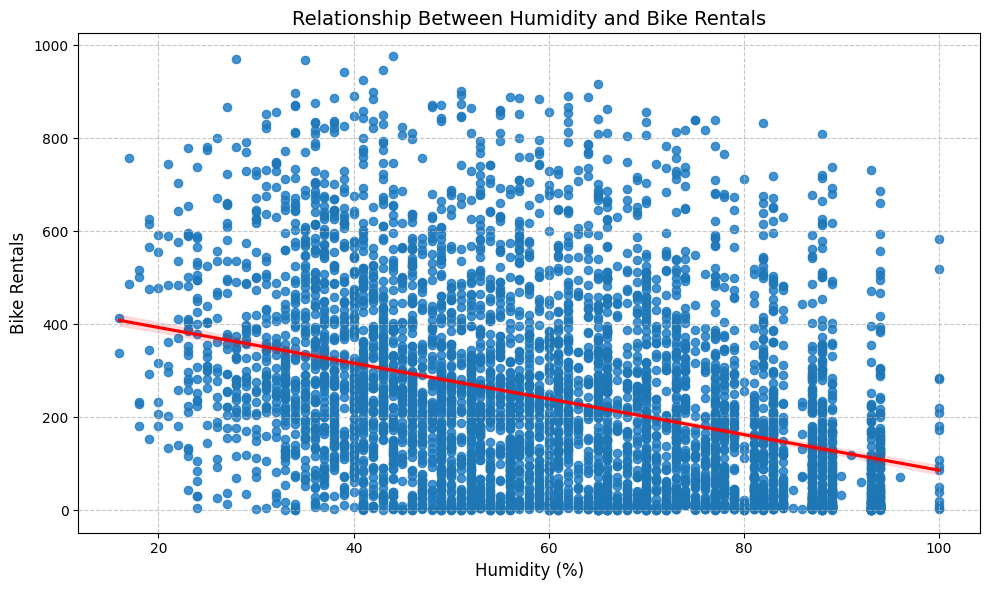

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for May 2012
may_2012_data = train_final_df[(train_final_df['year'] == 2012) ]

# Set up the plot
plt.figure(figsize=(10, 6))

# Create the scatter plot using Seaborn for better styling
sns.scatterplot(x=may_2012_data['humidity'], 
                y=may_2012_data['count'],   # Corrected this line to use the filtered data
                alpha=0.6, 
                color='dodgerblue', 
                edgecolor=None)
sns.regplot(x=may_2012_data['humidity'], 
            y=may_2012_data['count'], 
            scatter_kws={'alpha': 0.6}, 
            line_kws={"color": "red"})

# Add titles and labels
plt.title('Relationship Between Humidity and Bike Rentals', fontsize=14)
plt.xlabel('Humidity (%)', fontsize=12)
plt.ylabel('Bike Rentals', fontsize=12)

# Display gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


There is a negative co relation between rentals and humidity. As humidity increases there are less number of bike rentals.